## Project Team 8 - MGR : Music Genre Classification and Recoginition 

#### Import important modules 

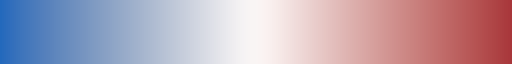

In [1]:
import numpy as np

import pandas as pd
pd.options.mode.chained_assignment = None

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()
    
    
import sklearn
from sklearn.model_selection import train_test_split

sns.color_palette("vlag", as_cmap=True)

#### Dataset and information 

In [2]:
df = pd.read_csv('data/features_30_sec.csv')
df = df.set_index('filename')
df.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
filename,,,,,,,,,,,,,,,,,,,,,
blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [3]:
df.describe()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,662030.846000,0.378682,0.086340,0.130930,0.003051,2201.780898,4.696916e+05,2242.541070,137079.155165,4571.549304,...,1.148144,60.730958,-3.966028,62.633624,0.507696,63.712586,-2.328761,66.231930,-1.095348,70.126096
std,1784.073992,0.081705,0.007735,0.065683,0.003634,715.960600,4.008995e+05,526.316473,96455.666326,1574.791602,...,4.578948,33.781951,4.549697,33.479172,3.869105,34.401977,3.755957,37.174631,3.837007,45.228512
min,660000.000000,0.171939,0.044555,0.005276,0.000004,570.040355,7.911251e+03,898.066208,10787.185064,749.140636,...,-15.693844,9.169314,-17.234728,13.931521,-11.963694,15.420555,-18.501955,13.487622,-19.929634,7.956583
25%,661504.000000,0.319562,0.082298,0.086657,0.000942,1627.697311,1.843505e+05,1907.240605,67376.554428,3380.069642,...,-1.863280,40.376442,-7.207225,40.830875,-2.007015,41.884240,-4.662925,41.710184,-3.368996,42.372865
50%,661794.000000,0.383148,0.086615,0.122443,0.001816,2209.263090,3.384862e+05,2221.392843,111977.548036,4658.524473,...,1.212809,52.325077,-4.065605,54.717674,0.669643,54.804890,-2.393862,57.423059,-1.166289,59.186117
75%,661794.000000,0.435942,0.091256,0.175682,0.003577,2691.294667,6.121479e+05,2578.469836,182371.576801,5533.810460,...,4.359662,71.691755,-0.838737,75.040838,3.119212,75.385832,0.150573,78.626444,1.312615,85.375374
max,675808.000000,0.663685,0.108111,0.397973,0.027679,4435.243901,3.036843e+06,3509.646417,694784.811549,8677.672688,...,13.457150,392.932373,11.482946,406.058868,15.388390,332.905426,14.694924,393.161987,15.369627,506.065155


In [4]:
print(df.shape)

(1000, 59)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, blues.00000.wav to rock.00099.wav
Data columns (total 59 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   length                   1000 non-null   int64  
 1   chroma_stft_mean         1000 non-null   float64
 2   chroma_stft_var          1000 non-null   float64
 3   rms_mean                 1000 non-null   float64
 4   rms_var                  1000 non-null   float64
 5   spectral_centroid_mean   1000 non-null   float64
 6   spectral_centroid_var    1000 non-null   float64
 7   spectral_bandwidth_mean  1000 non-null   float64
 8   spectral_bandwidth_var   1000 non-null   float64
 9   rolloff_mean             1000 non-null   float64
 10  rolloff_var              1000 non-null   float64
 11  zero_crossing_rate_mean  1000 non-null   float64
 12  zero_crossing_rate_var   1000 non-null   float64
 13  harmony_mean             1000 non-null   float64
 14  harmo

In [6]:
cols = df.columns.values.tolist()
print(cols)

['length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var', 'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean', 'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var', 'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo', 'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean', 'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var', 'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean', 'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var', 'label']


#### Check data for missing values

In [7]:
print("Categorical:", list(df.select_dtypes(include=['object']).columns))
print("Numerical:", list(df.select_dtypes(exclude=['object']).columns))

Categorical: ['label']
Numerical: ['length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var', 'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean', 'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var', 'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo', 'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean', 'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var', 'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean', 'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var']


In [8]:
print("Are there are any missing values?", 'Yes' if df.isnull().values.any() else 'No')
unique = df.nunique(axis=0)
total_null = df.isnull().sum()
print("Features with missing values", df.columns[df.isnull().any()].tolist())
percentage = (df.isnull().sum().sort_values(ascending=False)/len(df))*100
out = pd.concat([total_null,percentage, unique],axis=1, keys=["total_null","percentage","unique",])
out

Are there are any missing values? No
Features with missing values []


,total_null,percentage,unique
length,0,0.0,35
chroma_stft_mean,0,0.0,986
chroma_stft_var,0,0.0,986
rms_mean,0,0.0,986
rms_var,0,0.0,986
spectral_centroid_mean,0,0.0,986
spectral_centroid_var,0,0.0,986
spectral_bandwidth_mean,0,0.0,986
spectral_bandwidth_var,0,0.0,986
rolloff_mean,0,0.0,986


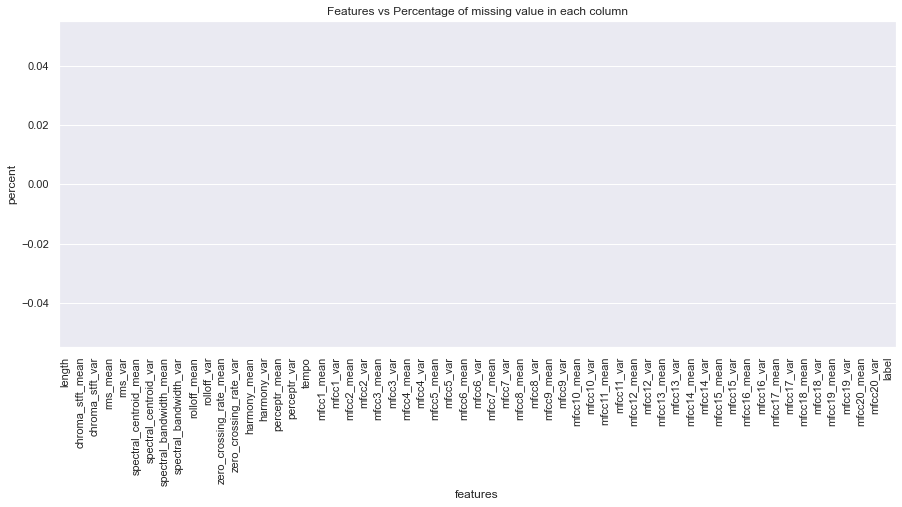

In [9]:
sns.set(rc={'figure.figsize':(15,6)});
plot_df = pd.DataFrame({'features':cols,'percent':percentage});
ax = sns.barplot(x='features',y ='percent',data=plot_df);
plt.xticks(rotation=90);
plt.title("Features vs Percentage of missing value in each column");

**From the above plot and exploration we can see there are no missing values, we have one categorical feature which is the label itself and the rest are numerical features**

### Explore the relationship between the target label and features

In [10]:
new_df = df.drop(columns=['length'])

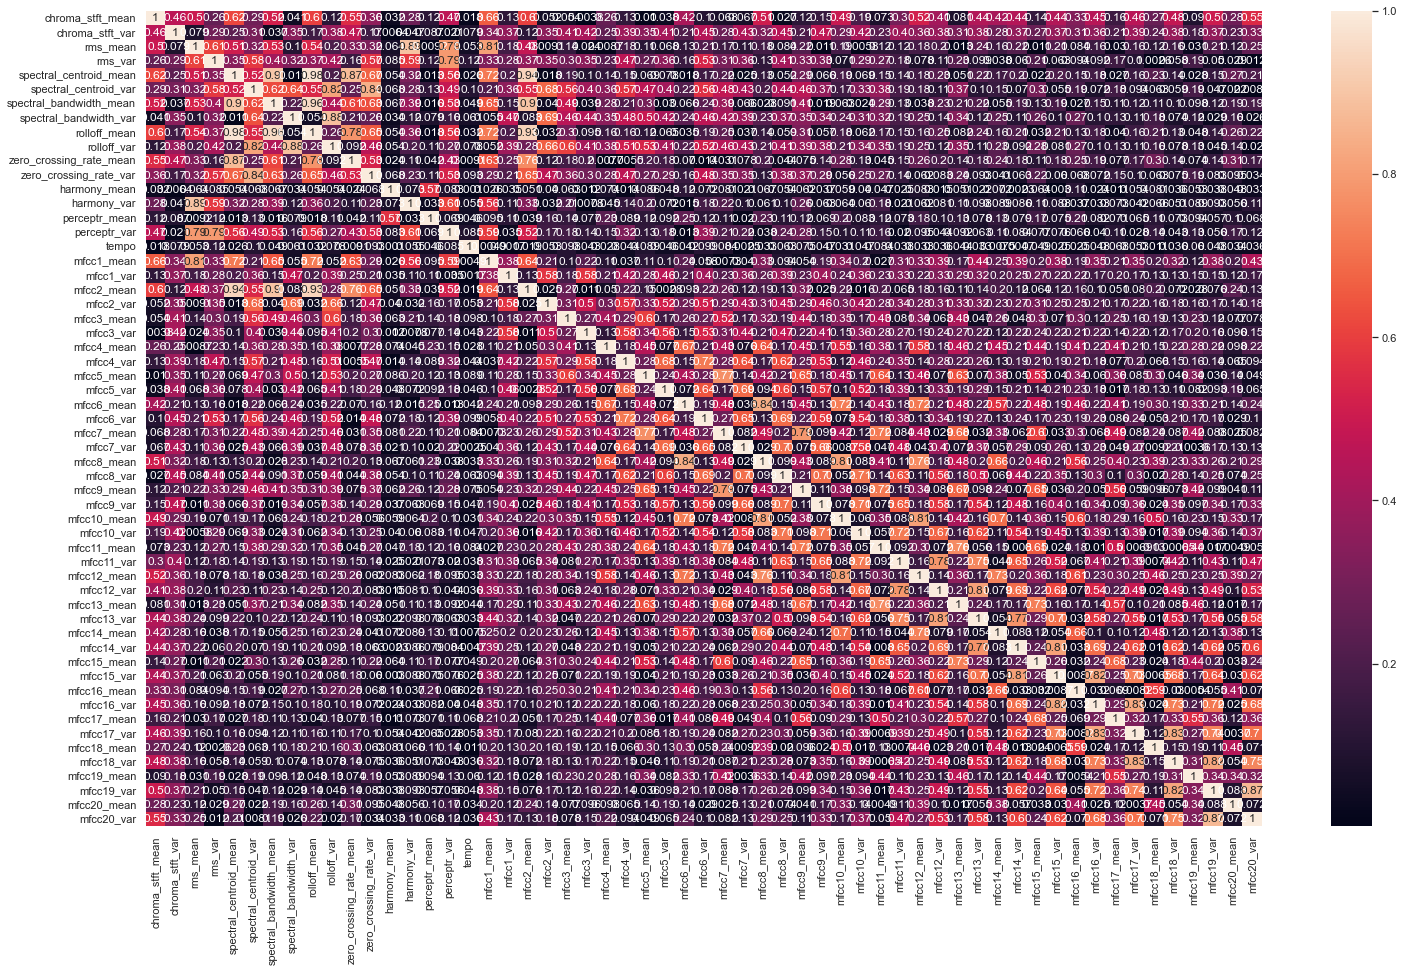

In [11]:
#code here

fig = plt.figure(figsize=(25,15))
vcorr = new_df.corr().abs()  ##get the absolute value for the correlation to figure out which blocks to drop
sns.heatmap(vcorr,annot=True)
plt.show()

In [12]:
### cite : https://stackoverflow.com/questions/29294983/how-to-calculate-correlation-between-all-columns-and-remove-highly-correlated-on

###taken from the stackoverflow code on how to drop highly correlated feature columns
high = vcorr.where(np.triu(np.ones(vcorr.shape), k=1).astype(np.bool))
correlated_cols = [column for column in high.columns if any(high[column] > 0.90)]
print("Features what are highly correlated:",correlated_cols)

Features what are highly correlated: ['spectral_bandwidth_mean', 'rolloff_mean', 'mfcc2_mean']


/var/folders/hk/fpn69pcx6jq8n7glwbj2pbp40000gn/T/ipykernel_65603/63728225.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  high = vcorr.where(np.triu(np.ones(vcorr.shape), k=1).astype(np.bool))


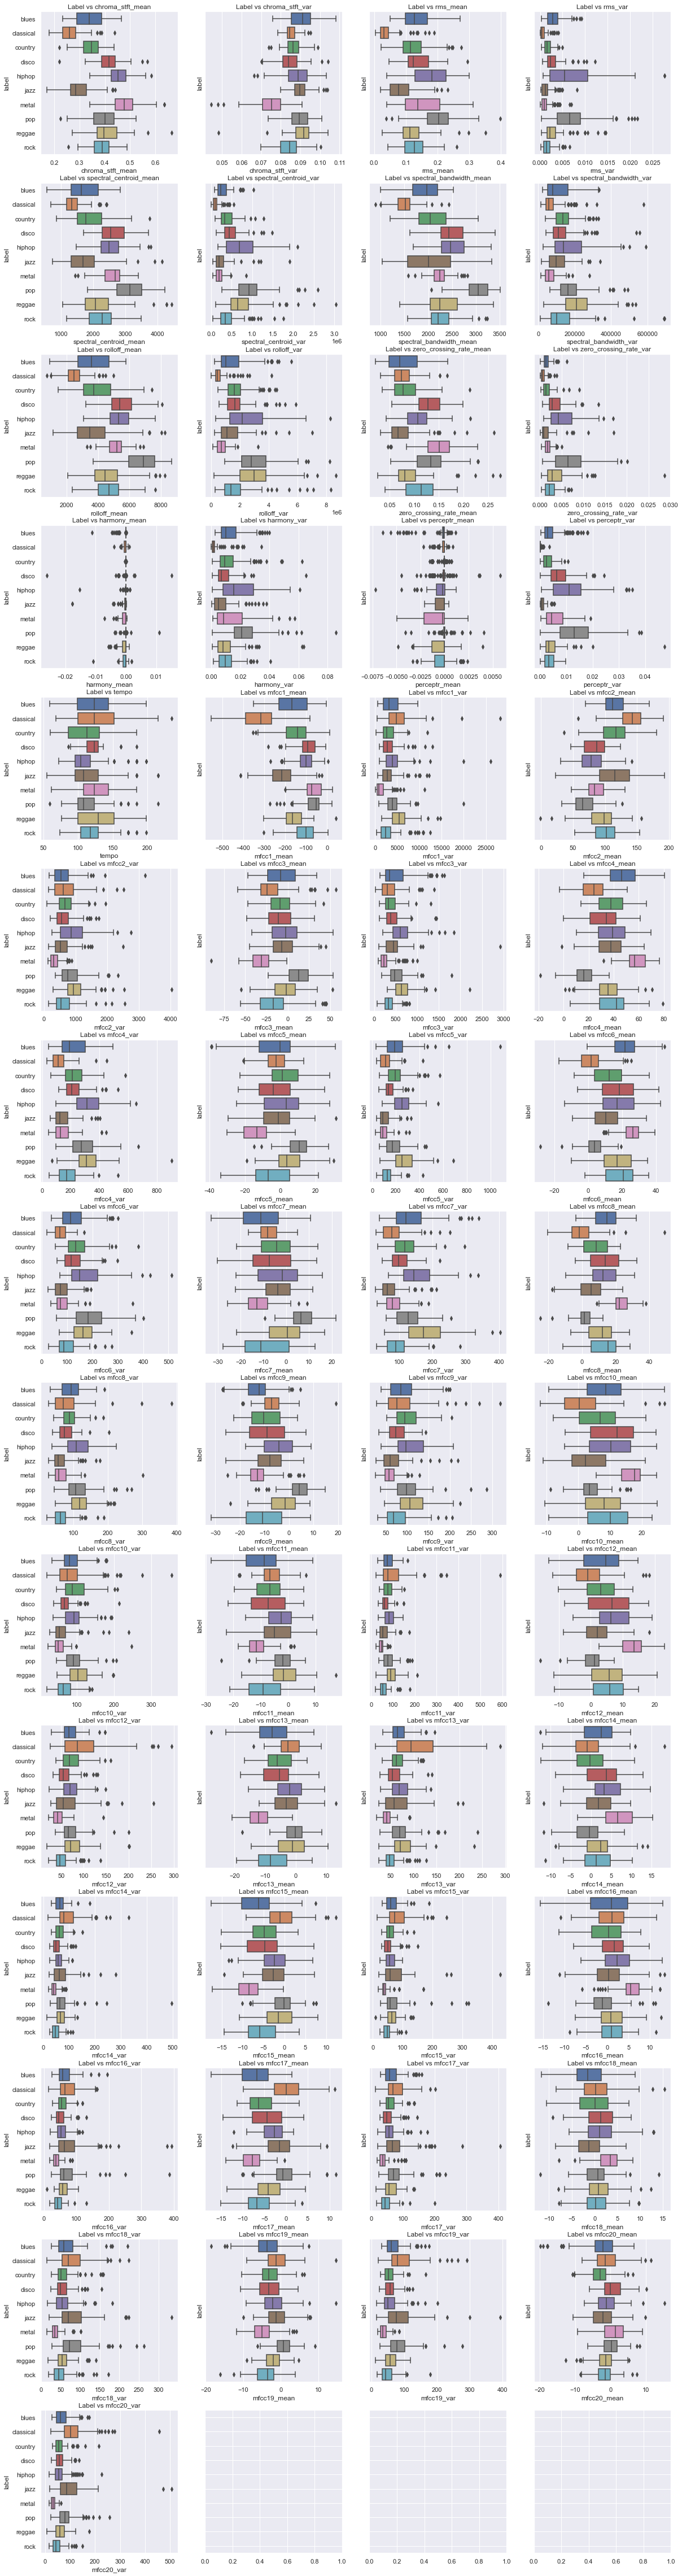

Text(0.5, 0.98, 'Relationship between the Label and 57.000000 features')

In [13]:
#code here

fig,ax = plt.subplots(15,4, figsize=(20,25), sharey=True)
ax = ax.ravel()
feature_list = list(new_df.columns)
feature_list.remove('label')
for i in range(0, len(feature_list)):
    sns.boxplot(x = new_df[str(feature_list[i])], y = new_df['label'], data = new_df, ax = ax[i])
    ax[i].set_title("Label vs " + feature_list[i])
plt.subplots_adjust(bottom=1, 
                    top=3.5)
plt.show()
fig.suptitle('Relationship between the Label and %f features'%(len(feature_list)))

### now we need to visualize how many beats per minutes are there in every genre

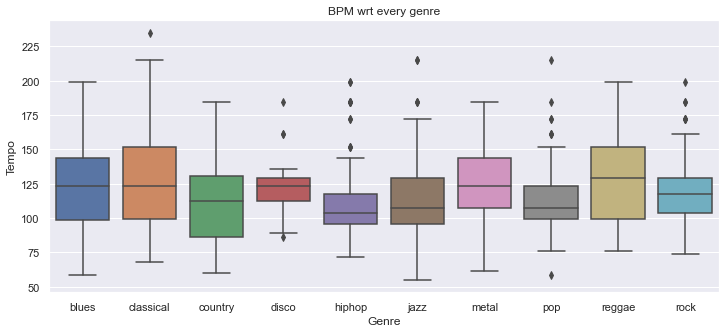

In [14]:
###code here

fig = plt.figure(figsize=(12,5))
plt.title('BPM wrt every genre')
sns.boxplot(x=new_df["label"],y=new_df["tempo"], data=new_df)
plt.ylabel('Tempo')
plt.xlabel('Genre')
plt.show()

As we can see from the boxplot, in genres **blues,country, metal & reggae** there are no outliers. All the samples in the dataset for these genres are normally spaced and the distances between the samples from random population for these genres is not abnormal